## Summary of peer comments
1. Dataset download instruction
    - I need to add more detail in the file dowload instruction
2. Uncleared file path
    - I uploaded the notebook only so my peer couldn't load the file when the tried to run the code
3. Cleaning data
    - The purpose of the cleaning data step need to be more specific
4. Describe data numericaly
    - Need to make more detail in the explaination as well as the comparision between the predicted and the actual results, consider the `count` and the `mean` value to obtain more information from the `describe` function
5. Visuallization
    - Need to include the interpretation and comparison of the graph and output
    - Need to provide an explaintion of relation between the interpretation of the graph and the hypothesis

# 1. Intro

- The paper that I picked is [Smoking accelerates aging of the small airway epithelium](https://respiratory-research.biomedcentral.com/articles/10.1186/s12931-014-0094-1). In this paper, the author tried to determine if Cigarette smoking accelerates lung function decline over time. After survey and analyse the data, they obtain a conlusion that `smoking accelerates aging of the small airway epithelium`

# 2. Relate research questions, data, and figures

## 2.1 Research question

### 2.1.1 Author's research question

The research question of the authors was cigarette smoking accelerates the aging of the small airway epithelium. By analysed the gene expression between 2 groups, The author shown that in the 13 genes significantly up-regulated by smoking, 11 demonstrated the same direction of expression observed with aging. In 5 genes significantly down-regulated by smoking, 2 demonstrated the same direction of expression observed with aging.

### 2.1.2 My research question

Another research question I could ask with this data set is `is there any thing in common of gene expression between smokers and nonsmoker group?`. Because the author already define the state of healthy based on based on history, physical exam, complete blood count, coagulation studies, liver function tests, urine studies, chest X-ray, EKG and pulmonary function tests. So I think it would be resonable for my research question

This is my research question in the project part 2 but it can not be answer with this dataset because the gene expression is difference between each person :(

### Improvement of the other component

Another research question that I can make based on the data is, which gene contribute the most into the accelerates the aging of the small airway epithelium. Because we already have the dataset of gene expression in each gene, we can compare the gene expression in 2 groups to see the differences.

## 2.2 Data

### 2.2.1 Collection

After consider the information such as history, physical exam, complete blood count, coagulation studies, liver function tests, urine studies, chest X-ray, EKG and pulmonary function tests select the `healthy` people. The author split the participation into 2 groups: smokers and non smokers.

For each person in the participation group, their `small airway epithelium` was collected by fiberoptic bronchoscopy by brushing. The samples will be use for RNA or DNA extraction.

The RNA from the people was extract by using TRIzol method and clean up the subsequence by RNeasy MinElute RNA purification kit. RNA quality was assessed using a Bioanalyzer, and only samples displaying an RNA integrity (RIN) value >6 were included

For the gene expression data, all of the samples was submited to the Genomics Resources Core Facility at Weill Cornell Medical College. After the preprocessing (hybridization, washing and scanning) and normalize, they generate a `P` value that used for filtering. So the gene expression of the gene that have the `P` value larger or equal to 10% were consider to expressed in small airway epithelium.

### 2.2.2 Files

Both of the files below are `tsv` file (Tab-Separated Values) which is a text file that store the data from a table where each row is separates by tab.

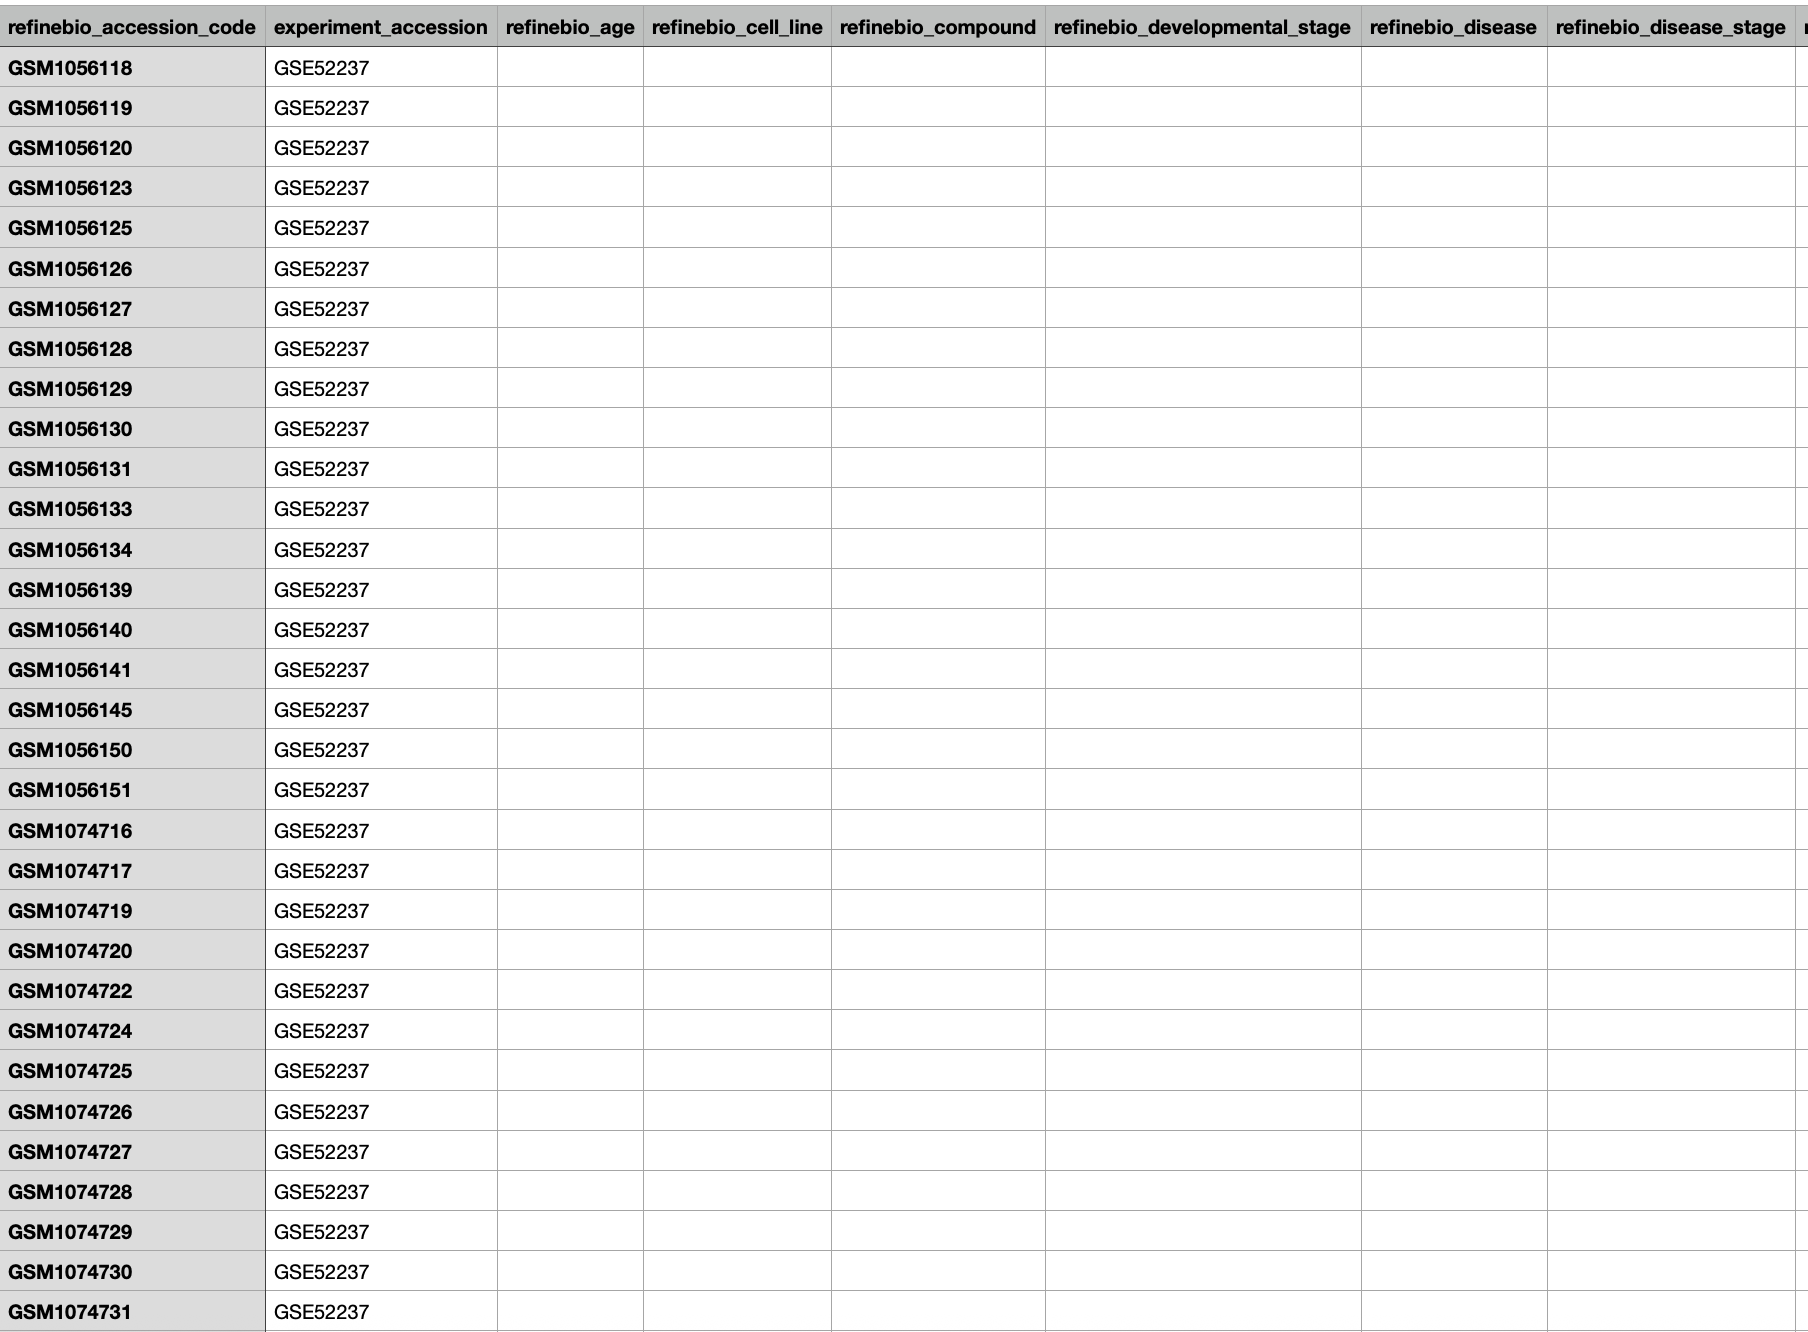

In [3]:
display(Image(filename="metadata.png"))

In this data, each row is represent every single gene in human genome and each column is represent each of the participant. The numerical values are the gene expression of each gene of each person.

## 2.3 Figures

### Figure 1A

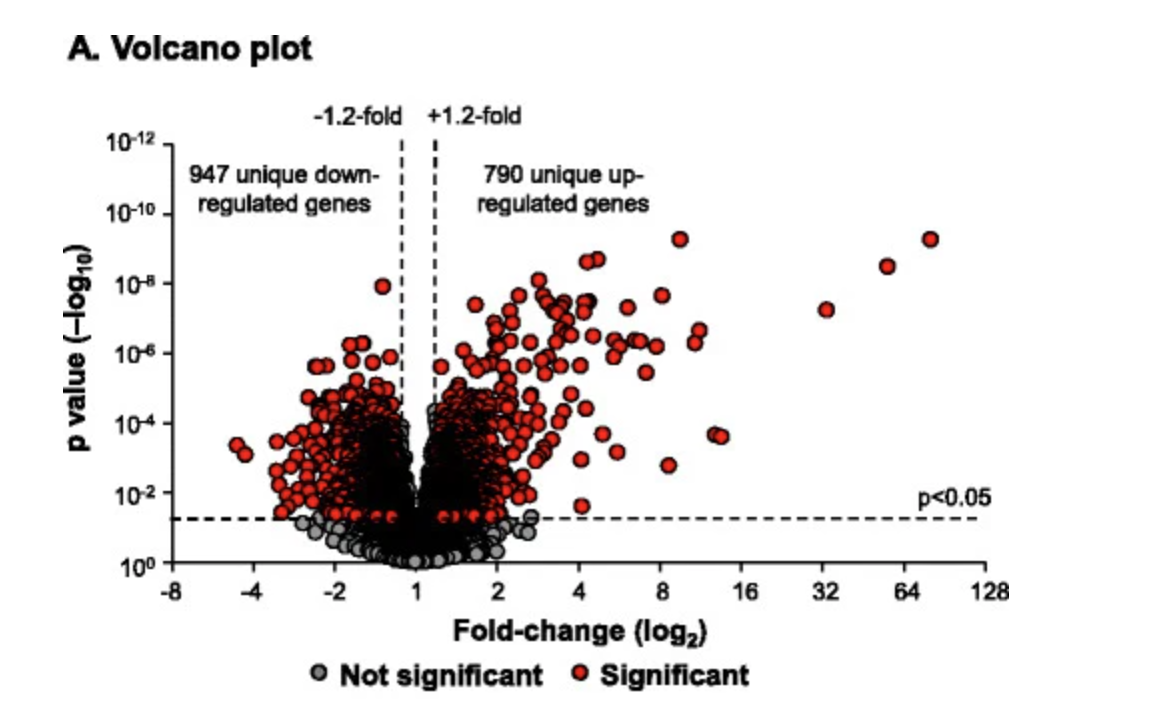

In [2]:
from IPython.display import Image, display
display(Image(filename="fig1.png"))

Figure 1A is the vocalo plot compare the small airway epithelium of smokers versus nonsmokers. Which is the x-axis is representing the $\log_2(\text{fold change})$ (ratio of expression between smokers and non smokers) and the y-axis represent the $-\log(\text{p-value})$ 

Each of the dots is represent for each gene which is labled by the color `red` for significant fold change and `gray` for not significant genes. Also, the author wanted to show that there is a barrier between 2 group of gene (up regulated and down regulated) and most of the gene that have significant in fold-change between 2 groups are all have p-value < 0.05. 

### Table 3

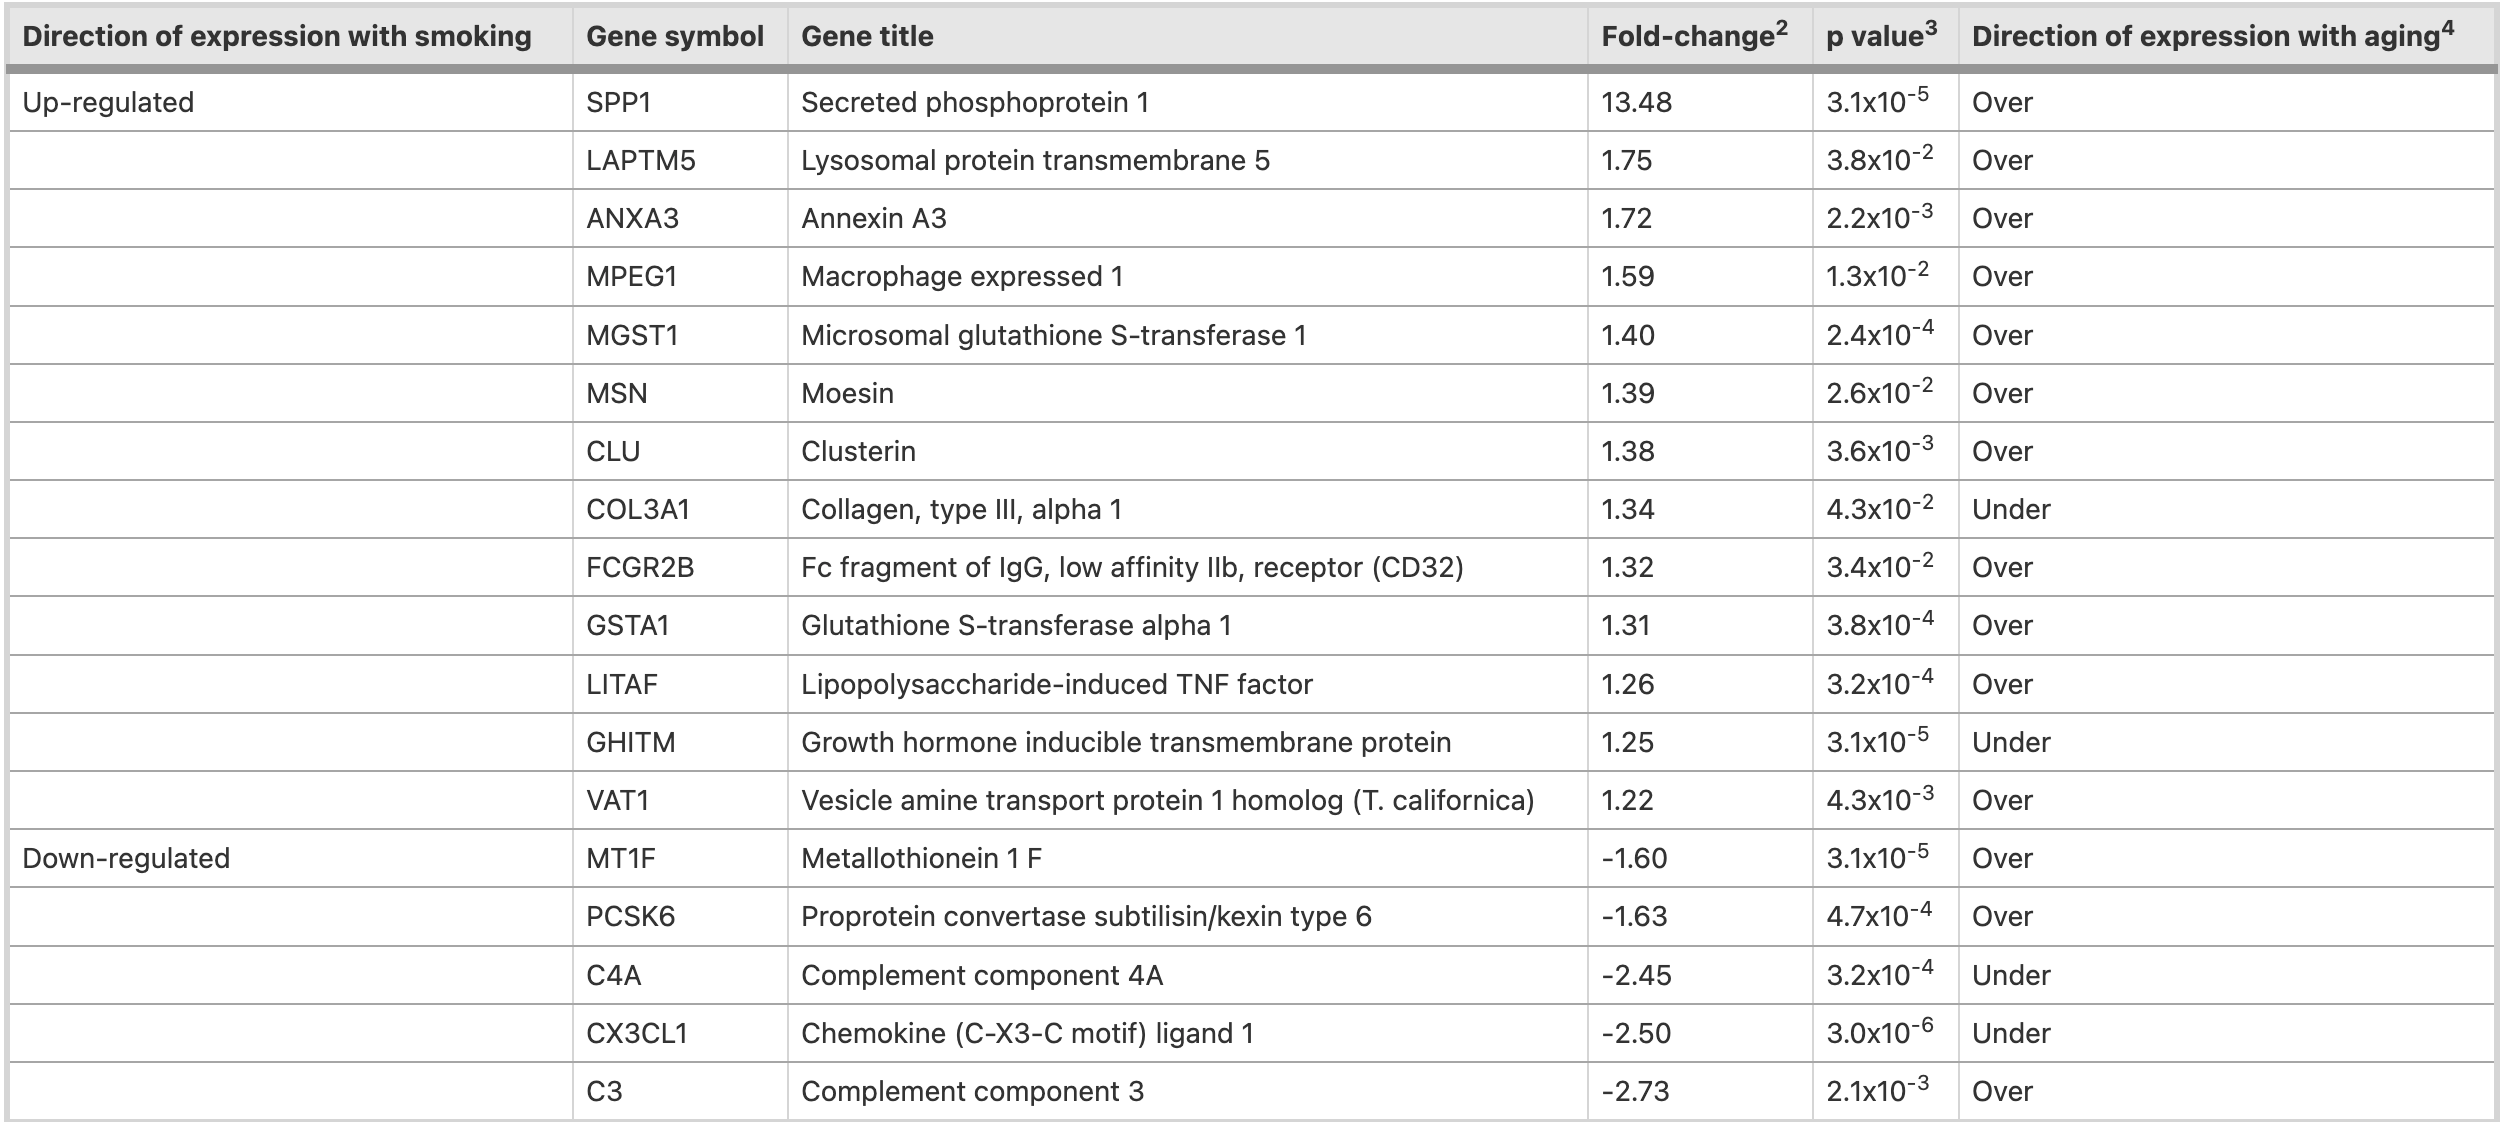

In [4]:
display(Image(filename="table3.png"))

table 3 is containing 18 genes of aging signature with the other information such as `gene title`, `fold change`, `p value`, `direction`. The author want to make a detailed and easier to lookup version of the content in the result section. 

### The figure or table that I would make to support the process of understanding data

Another figure I think that would be helpful to understand the data is a box plot which has the x-axis as the genes of aging signature (67 genes) and the y-axis as the gene expression. There will have 2 boxes in each gene, each box is represents each group of people (smokers and non-smokers). I think it would be helpful to comparision the differnet of the distribution of gene expression across 2 groups of people.

# 3. Data cleaning and exploration

The data contain 54 observations - which is the people in the participation group and 20056 feautures - which is the number of gene that the author obtained.

## 3.1: Load and clean data

For the data of this paper, I downloaded it directly from Refine Bio in `csv` format. You can follow this [link](https://www.refine.bio/experiments/GSE52237/smoking-accelerated-aging-of-the-small-airway-epithelium?ref=search) to download the dataset.

### Read data as data frame

In this part, I put 2 of the dataset in the home directory so the other people can just run my script below without any modification

In [5]:
import pandas as pd

In [6]:
expression_data = pd.read_csv('GSE52237.tsv', sep = '\t')
expression_data = expression_data.set_index('Gene')
expression_data.head()

,GSM1056118,GSM1056119,GSM1056120,GSM1056123,GSM1056125,GSM1056126,GSM1056127,GSM1056128,GSM1056129,GSM1056130,...,GSM1074764,GSM1074767,GSM1074768,GSM1074769,GSM1074773,GSM1074775,GSM1074778,GSM1261679,GSM1261680,GSM1261681
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,29.981244,31.747819,31.386927,31.993196,32.339347,28.523834,30.182986,33.210056,43.645364,33.967599,...,33.575219,43.156573,34.345466,24.755338,29.981244,41.560258,33.849612,33.331734,50.221056,26.901942
ENSG00000000005,-0.143586,0.038440,-0.133379,-0.171847,-0.149805,-0.134076,-0.113953,-0.063036,-0.144724,-0.151878,...,-0.202168,-0.048446,-0.144910,-0.145672,-0.138889,-0.157688,-0.079969,-0.102527,-0.212069,-0.224132
ENSG00000000419,18.575561,19.250078,18.231130,18.540253,18.436864,17.320028,19.434920,18.673765,19.774700,21.728454,...,20.809183,17.600276,17.600276,18.540253,17.264551,19.060835,16.150394,17.015742,19.286374,18.404764
ENSG00000000457,2.945813,2.728688,2.752216,2.699488,2.808509,2.937645,2.772635,2.702764,2.609821,2.911894,...,2.702764,2.887749,2.654390,2.367492,2.448115,2.360185,2.701432,2.721351,3.030017,2.631565
ENSG00000000460,0.366913,0.197192,0.258847,0.203672,0.278152,0.302490,0.312018,0.286498,0.200958,0.219814,...,0.184781,0.256946,0.127923,0.170780,0.326019,0.195673,0.220555,0.385518,0.249294,0.255636


Since there is a `meta data` that contain an important information about the participant which is `smoking status` so I will merge that information into the main data frame

It is not a real `cleaning`, I merge the `smoking status` columns into the gene expression dataset because the information is need to make the plot comparision plot below.

In [7]:
meta_data = pd.read_csv('metadata_GSE52237.tsv', sep = '\t')
meta_data = meta_data.set_index('refinebio_accession_code')
meta_data.head()

,experiment_accession,refinebio_age,refinebio_cell_line,refinebio_compound,refinebio_developmental_stage,refinebio_disease,refinebio_disease_stage,refinebio_genetic_information,refinebio_organism,refinebio_platform,...,platform_id,scan_protocol,series_id,source_name_ch1,status,submission_date,supplementary_file,taxid_ch1,title,type
refinebio_accession_code,,,,,,,,,,,,,,,,,,,,,
GSM1056118,GSE52237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HOMO_SAPIENS,Affymetrix Human Genome U133 Plus 2.0 Array (h...,...,GPL570,GeneChips were scanned using the GeneChip Scan...,"['GSE43079', 'GSE52237', 'GSE76324', 'GSE76327...","small airway epithelium (SAE), S",Public on Aug 05 2013,Dec 20 2012,['ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM10...,9606,DGM-11103_sm,RNA
GSM1056119,GSE52237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HOMO_SAPIENS,Affymetrix Human Genome U133 Plus 2.0 Array (h...,...,GPL570,GeneChips were scanned using the GeneChip Scan...,"['GSE43079', 'GSE52237', 'GSE76324', 'GSE76327...","small airway epithelium (SAE), S",Public on Aug 05 2013,Dec 20 2012,['ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM10...,9606,DGM-11133_sm,RNA
GSM1056120,GSE52237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HOMO_SAPIENS,Affymetrix Human Genome U133 Plus 2.0 Array (h...,...,GPL570,GeneChips were scanned using the GeneChip Scan...,"['GSE43079', 'GSE43939', 'GSE52237', 'GSE63127...",small airway epithelium brushing,Public on Aug 05 2013,Dec 20 2012,['ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM10...,9606,DGM-10123_M0_sm,RNA
GSM1056123,GSE52237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HOMO_SAPIENS,Affymetrix Human Genome U133 Plus 2.0 Array (h...,...,GPL570,GeneChips were scanned using the GeneChip Scan...,"['GSE43079', 'GSE43939', 'GSE52237', 'GSE63127...",small airway epithelium brushing,Public on Aug 05 2013,Dec 20 2012,['ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM10...,9606,DGM-10254_M0_sm,RNA
GSM1056125,GSE52237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HOMO_SAPIENS,Affymetrix Human Genome U133 Plus 2.0 Array (h...,...,GPL570,GeneChips were scanned using the GeneChip Scan...,"['GSE43079', 'GSE43939', 'GSE52237', 'GSE63127...",small airway epithelium brushing,Public on Aug 05 2013,Dec 20 2012,['ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM10...,9606,DGM-10288_M0_sm,RNA


In [8]:
meta_data.columns

Index(['experiment_accession', 'refinebio_age', 'refinebio_cell_line',
       'refinebio_compound', 'refinebio_developmental_stage',
       'refinebio_disease', 'refinebio_disease_stage',
       'refinebio_genetic_information', 'refinebio_organism',
       'refinebio_platform', 'refinebio_processed', 'refinebio_processor_id',
       'refinebio_processor_name', 'refinebio_processor_version',
       'refinebio_race', 'refinebio_sex', 'refinebio_source_archive_url',
       'refinebio_source_database', 'refinebio_specimen_part',
       'refinebio_subject', 'refinebio_time', 'refinebio_title',
       'refinebio_treatment', 'channel_count',
       'characteristics_ch1_cilia length',
       'characteristics_ch1_smoking status', 'contact_address', 'contact_city',
       'contact_country', 'contact_department', 'contact_email',
       'contact_institute', 'contact_laboratory', 'contact_name',
       'contact_state', 'contact_zip/postal_code', 'data_processing',
       'data_row_count', 'descrip

In [9]:
smoking = meta_data['characteristics_ch1_smoking status']
smoking.head()

refinebio_accession_code
GSM1056118            S
GSM1056119            S
GSM1056120    nonsmoker
GSM1056123    nonsmoker
GSM1056125    nonsmoker
Name: characteristics_ch1_smoking status, dtype: object

In [10]:
expression_data = expression_data.transpose()
expression_data

Gene,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283307,ENSG00000283597,ENSG00000283632,ENSG00000283703,ENSG00000283709,ENSG00000283849,ENSG00000283945,ENSG00000284048,ENSG00000284309,ENSG00000284543
GSM1056118,29.981244,-0.143586,18.575561,2.945813,0.366913,0.900711,5.482163,3.341973,25.365759,0.624474,...,0.041599,0.070193,1.171113,0.800623,1.673978,0.161972,-0.184797,-0.044305,0.308182,0.413009
GSM1056119,31.747819,0.038440,19.250078,2.728688,0.197192,1.548284,2.205023,3.596421,17.937559,0.578383,...,0.148047,-0.091037,1.144370,0.472382,2.943532,0.270684,-0.097418,-0.023128,0.314540,0.610235
GSM1056120,31.386927,-0.133379,18.231130,2.752216,0.258847,1.882620,4.447744,3.184208,7.931365,0.612130,...,0.107044,-0.025126,0.937925,0.587265,1.931466,0.147288,-0.155722,0.032102,0.470455,0.406304
GSM1056123,31.993196,-0.171847,18.540253,2.699488,0.203672,0.807478,4.828619,3.178343,6.347075,0.610080,...,0.081891,-0.058532,1.195254,0.515074,3.008495,0.162964,-0.153992,0.160228,0.458548,0.397893
GSM1056125,32.339347,-0.149805,18.436864,2.808509,0.278152,1.500813,4.808286,3.241494,8.820678,0.581808,...,0.022995,-0.061655,1.190825,0.761621,2.286711,0.239532,-0.151677,0.060307,0.158558,0.356220
GSM1056126,28.523834,-0.134076,17.320028,2.937645,0.302490,0.913279,5.651229,3.658626,7.772323,0.667989,...,0.097042,-0.042096,1.437785,0.703843,2.409030,0.116280,-0.166065,-0.023200,0.446443,0.370460
GSM1056127,30.182986,-0.113953,19.434920,2.772635,0.312018,3.030017,5.114217,3.163605,8.261811,0.565968,...,0.049073,-0.194796,1.492903,0.493192,2.573850,0.222524,-0.054042,-0.089951,0.148198,0.380818
GSM1056128,33.210056,-0.063036,18.673765,2.702764,0.286498,0.851507,5.023963,2.879758,6.438896,0.579860,...,-0.029317,0.030518,1.105723,0.681462,1.432856,0.095114,-0.072206,0.154276,0.367954,0.382838
GSM1056129,43.645364,-0.144724,19.774700,2.609821,0.200958,0.817653,3.555661,3.199988,6.403245,0.573143,...,0.097197,-0.064118,1.270958,0.513733,1.791940,0.265443,-0.177874,0.100023,0.458182,0.388650
GSM1056130,33.967599,-0.151878,21.728454,2.911894,0.219814,0.913279,5.779563,3.959932,13.950803,0.569789,...,0.059817,-0.079969,1.279696,0.602270,1.807123,0.370995,-0.144724,-0.076441,0.665958,0.481951


In [11]:
expression_data['smoking'] = smoking
expression_data.head()

Gene,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283597,ENSG00000283632,ENSG00000283703,ENSG00000283709,ENSG00000283849,ENSG00000283945,ENSG00000284048,ENSG00000284309,ENSG00000284543,smoking
GSM1056118,29.981244,-0.143586,18.575561,2.945813,0.366913,0.900711,5.482163,3.341973,25.365759,0.624474,...,0.070193,1.171113,0.800623,1.673978,0.161972,-0.184797,-0.044305,0.308182,0.413009,S
GSM1056119,31.747819,0.038440,19.250078,2.728688,0.197192,1.548284,2.205023,3.596421,17.937559,0.578383,...,-0.091037,1.144370,0.472382,2.943532,0.270684,-0.097418,-0.023128,0.314540,0.610235,S
GSM1056120,31.386927,-0.133379,18.231130,2.752216,0.258847,1.882620,4.447744,3.184208,7.931365,0.612130,...,-0.025126,0.937925,0.587265,1.931466,0.147288,-0.155722,0.032102,0.470455,0.406304,nonsmoker
GSM1056123,31.993196,-0.171847,18.540253,2.699488,0.203672,0.807478,4.828619,3.178343,6.347075,0.610080,...,-0.058532,1.195254,0.515074,3.008495,0.162964,-0.153992,0.160228,0.458548,0.397893,nonsmoker
GSM1056125,32.339347,-0.149805,18.436864,2.808509,0.278152,1.500813,4.808286,3.241494,8.820678,0.581808,...,-0.061655,1.190825,0.761621,2.286711,0.239532,-0.151677,0.060307,0.158558,0.356220,nonsmoker


### Shape of the data set

In [12]:
expression_data.shape

(54, 20057)

There 20056 column which are represent for 20056 genes in human body and 54 row represent for 54 people in 2 groups `smokers` and `non smokers`. The extra column is the smoking status of the paitients

### Features selecting

I select 2 features `ENSG00000008394` and `ENSG00000243955` which are 2 of the genes with aging signature. I expected that the gene expression of those genes in `smoker` will be higher than `non smoker`

### Impovement from peers comments

For this section, I consider the other factors in `describe` function which are: `min`, `max`, `mean`, `count` to have more insight about the dataset. \
For the range of gene expression between 2 group of people, I expect that the range of `smoker` group will be larger than `non-smoker` group - which mean that the `min` and `max` values of `smoker` group will be larger than `min` and `max` value of `non smoker` group. Since 2 groups have similar number of people, I also expect that the `mean` value of gene expression in `smoker` group would be higher than the `mean` value of gene expression in `non smoker` group

In [19]:
aging_gen = ['ENSG00000008394','ENSG00000243955']
expression_data.groupby('smoking')[aging_gen].describe()

Gene      ENSG00000008394                                             \
                    count       mean       std        min        25%   
smoking                                                                
S                     2.0  32.747000  5.720967  28.701665  30.724333   
nonsmoker            28.0  21.429290  2.318780  14.834320  20.325352   
smoker               24.0  29.758807  6.365018  20.377752  25.262229   

Gene                                       ENSG00000243955              \
                 50%        75%        max           count        mean   
smoking                                                                  
S          32.747000  34.769667  36.792335             2.0  107.010163   
nonsmoker  21.626678  22.400454  26.670071            28.0   92.885669   
smoker     29.732549  34.416878  45.482671            24.0  104.299681   

Gene                                                                  \
                 std         min         25%         50%         75%   
smoking                                                                
S           2.080569  105.538978  106.274571  107.010163  107.745755   
nonsmoker  14.955927   64.646987   85.134303   92.376012   98.325130   
smoker     11.060130   69.251904  100.464125  107.010163  111.452299   

Gene                   
                  max  
smoking                
S          108.481347  
nonsmoker  120.045574  
smoker     120.045574

- The results is really similar with what I expected. Most of the factor in 2 gene have higher value of gene expression in `smoker` group compare with `non - smoker` group

### Impovement from peers comments

- The results is really similar with what I expected. Most of the factor in 2 gene have higher value of gene expression in `smoker` group compare with `non - smoker` group. But in the factors `min` and `max` of the gene `ENSG00000243955`. We can see that the value of gene expression is no significantly difference between 2 groups

## Visualization

I think a violin plot would be perfect to visualize the data set because it contain almost the information needed in the `describe` function. Beside that, it also show the distribution of the data so we can have a better understanding about the data that we obtain.

In [14]:
import seaborn as sns

I used `seaborn violin plot` to visualize the data. In my plot, the x-axis is represent for the smoking status of the paitients and the y-axis is represent for the value of gene expression in each gene

### Improvement from peer comments

From the graph below, we can see the `max` and `mean` value of the `smoker` group are significantly higher than `non smoker` group. Only the `min` value of 2 groups are slightly difference with the other but the `min` value in gene expression of `smoker` group still higher than `non smoker` group

<Axes: xlabel='smoking', ylabel='ENSG00000008394'>

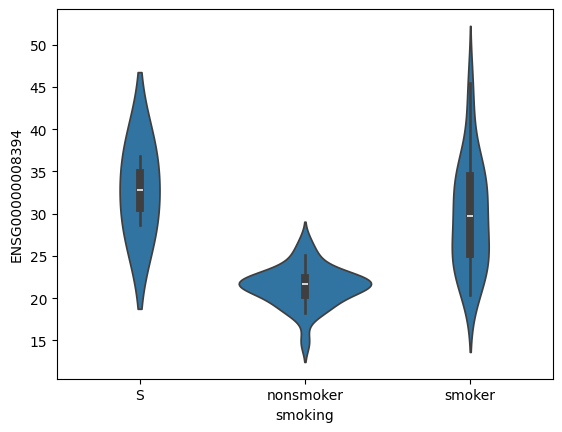

In [37]:
sns.violinplot( data = expression_data, x = 'smoking', y = 'ENSG00000008394')

Based on the graph, we can see that the gene expression at all of the factors that I mentioned above in the `smoking` group is higher than the `un smoking` group

This is support the hypothesis because if we look at the table 3, symbol of the gene `ENSG00000008394` - `MPEG1` has the same direction with aging. Which mean that the larger of the gene expresison, the larger value of aging in that gene

### Improvement from peer comments

From the graph below, we can see the `mean` value of the `smoker` group are higher than `non smoker` group. The `min` and `max`  value of 2 groups are slightly difference with the other but it still higher than `non smoker` group

<Axes: xlabel='smoking', ylabel='ENSG00000243955'>

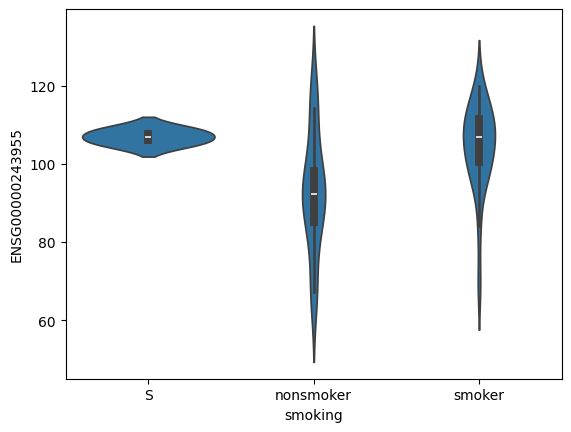

In [16]:
sns.violinplot( data = expression_data, x = 'smoking', y = 'ENSG00000243955')

Based on the graph, we can see that the gene expression at all of the factors that I mentioned above in the `smoking` group is higher than the `un smoking` group

This is support the hypothesis because if we look at the table 3, symbol of the gene `ENSG00000243955` - `GSTA1` has the same direction with aging. Which mean that the larger of the gene expresison, the larger value of aging in that gene. But the information from this plot is not strongly support the hypothesis because there is no significant different between the `min`, `max` and `mean` value of the gene expression between 2 groups.